# Programming Component

__Submit this component of the homework via GitHub by the due date.__


## Preparation


1. Add a 'processed' directory to the 'data' folder in your repository.
1. Add a line at the end of the HW_02.ipynb file that saves the merged and cleaned dataset to 'data/processed' directory.
1. Run the HW_02.ipynb file to create the processed data file.
1. Commit and push your changes to GitHub.

__NOTE__: Do not include the data files in your GitHub repository. Make sure your .gitignore file is set up to ignore data files.


## Homework - Principal Component Analysis

The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties.
While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA.
Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

1. The following variables are used in the SVI:
`EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`
    a. Subset the merged dataset to only include the variables above and look at the pattern of missing data.
    Are missing observations scattered throughout the data or are entire rows or columns missing?
    b. PCA cannot handle missing values by default.
    There are several options for handling missing data generally, including imputation, removing rows with missing data, or removing columns with missing data.
    Deal with the missing data in a way that makes sense for the pattern of missing data and the goals of the analysis. Explain why you made this decision.
    _Note: How you handle this is specific to the missing data pattern and the goals of the analysis.
    For example, when entire rows or columns are missing, imputation may not be appropriate and dropping those rows or columns is usually the best option.
    Conversely, if you have a general missingness pattern where missing observations are scattered throughout the data, imputation is likely the best option._
    a. After dealing with the missing data, perform PCA on the SVI variables.

In [46]:
import pandas as pd

#Importing the SVI dataset    
    
file_path = '../data/processed/merged_dataset.csv'           
svi_data = pd.read_csv(file_path,dtype = {'STCOFIPS':str})       

print(svi_data.head())  

svi_data_drop = svi_data.drop(columns= ['STCOFIPS'])    
svi_data_drop.index = svi_data['STCOFIPS']

#Subseting the dataset to only include some variables   

new_columns_svi = ['EP_POV150'] + ['EP_UNEMP'] + ['EP_HBURD'] + ['EP_NOHSDP']+['EP_UNINSUR'] + ['EP_AGE65'] + ['EP_AGE17'] +['EP_DISABL'] + ['EP_SNGPNT'] + ['EP_LIMENG'] + ['EP_MINRTY'] + ['EP_MUNIT'] + ['EP_MOBILE'] + ['EP_CROWD'] + ['EP_NOVEH'] + ['EP_GROUPQ'] + ['EP_NOINT']
newsvi_data = svi_data_drop[new_columns_svi] 

#Looking the pattern of missing values in the dataset   
mis_data = newsvi_data.isnull().sum()   
mis_data_mean = newsvi_data.isnull().mean()
print(mis_data) 
print(mis_data_mean)

  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    10001         NaN    3.687000         0.0    3.904782    0.000330   
1    10003         NaN    3.687000         0.0    5.667769    0.000399   
2    10005         NaN    3.654749         0.0    2.620629    0.000247   
3     1001         NaN         NaN         0.0   25.969774    0.000431   
4     1003         NaN    3.684142         0.0   12.353442    0.000338   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...  EP_NOVEH  EP_GROUPQ  \
0    1.723723    0.960109    0.113562    0.438717  ...       6.8        2.5   
1    2.427157    6.561273    0.093744    1.060899  ...       7.0        2.7   
2    0.961604    0.892028    0.176610    0.405957  ...       3.6        1.1   
3    2.806764    0.371517    0.080450    0.402025  ...       4.0        0.9   
4    1.529256    0.939761    0.248233    0.191996  ...       2.3        1.5   

   EP_NOINT  EP_AFAM  EP_HISP  EP_ASIAN  EP_AIAN  EP_NHPI  EP_TWOMORE  \
0      

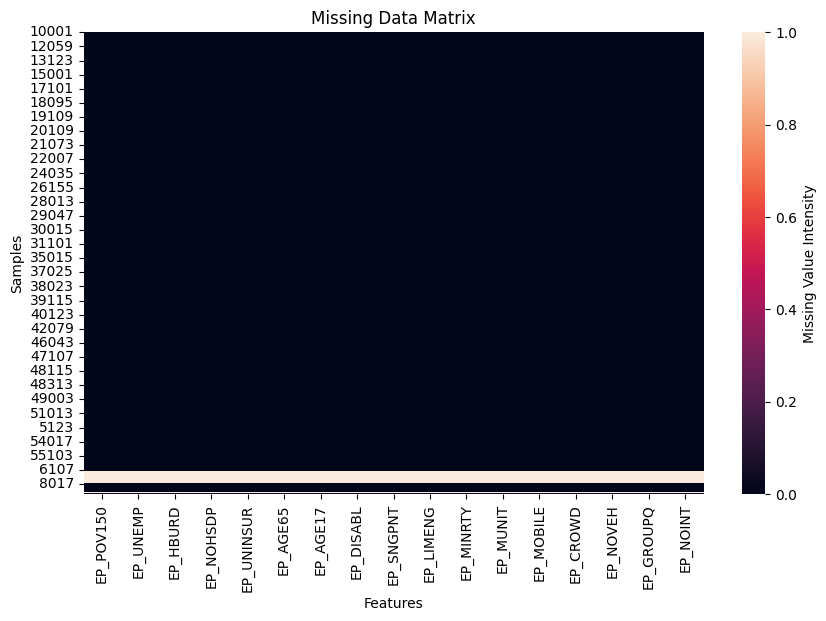

In [47]:
#Plotting the missing values    
import matplotlib.pyplot as plt 
import seaborn as sns   

plt.figure(figsize=(10,6))  
sns.heatmap(newsvi_data.isnull(), cbar=True, cbar_kws={'label': 'Missing Value Intensity'})
plt.title('Missing Data Matrix')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

We can see in the heatmap that the missing values correspond to a specific rows in the dataset, so the best strategy in this case is just drop those values.

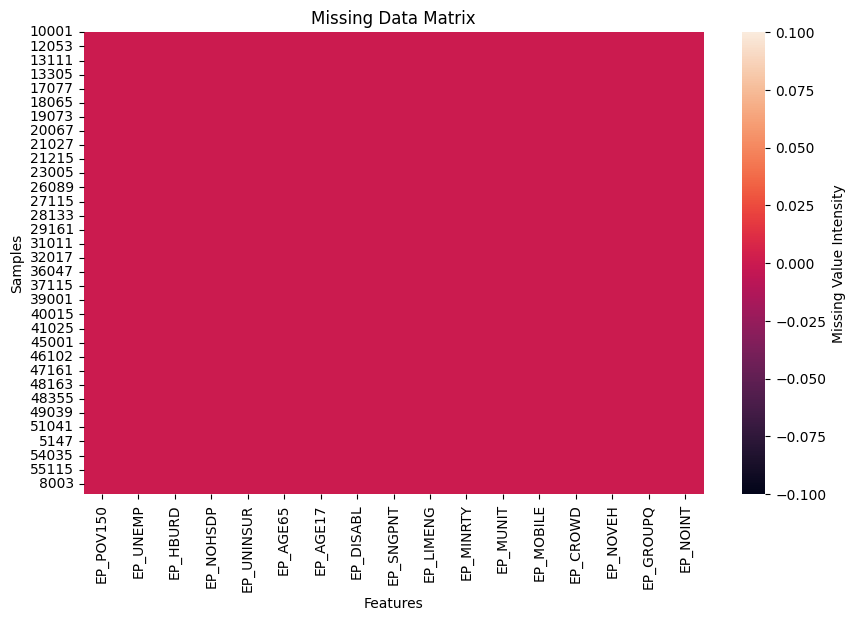

In [48]:
#Dropping the missing values and displaying the heatmap again    

newsvi_data_drop = newsvi_data.dropna() 

plt.figure(figsize=(10,6))  
sns.heatmap(newsvi_data_drop.isnull(), cbar=True, cbar_kws={'label': 'Missing Value Intensity'})
plt.title('Missing Data Matrix')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

Now we can see there are no missing values. Just to be completely sure, we can print the counting of missing values by variable.

In [49]:
mis_data_drop = newsvi_data_drop.isnull().sum()   
mis_data_drop_mean = newsvi_data_drop.isnull().mean()
print(mis_data_drop) 
print(mis_data_drop_mean)

EP_POV150     0
EP_UNEMP      0
EP_HBURD      0
EP_NOHSDP     0
EP_UNINSUR    0
EP_AGE65      0
EP_AGE17      0
EP_DISABL     0
EP_SNGPNT     0
EP_LIMENG     0
EP_MINRTY     0
EP_MUNIT      0
EP_MOBILE     0
EP_CROWD      0
EP_NOVEH      0
EP_GROUPQ     0
EP_NOINT      0
dtype: int64
EP_POV150     0.0
EP_UNEMP      0.0
EP_HBURD      0.0
EP_NOHSDP     0.0
EP_UNINSUR    0.0
EP_AGE65      0.0
EP_AGE17      0.0
EP_DISABL     0.0
EP_SNGPNT     0.0
EP_LIMENG     0.0
EP_MINRTY     0.0
EP_MUNIT      0.0
EP_MOBILE     0.0
EP_CROWD      0.0
EP_NOVEH      0.0
EP_GROUPQ     0.0
EP_NOINT      0.0
dtype: float64


2. Plot the eigenvectors or loadings associated of the first three principal components.
Make sure that the axis labels correspond to the variable names and not the indices of the variables.
How would you interpret the first three principal components?
_Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html)._

In [50]:
#Attempting to perform PCA analysis

from sklearn.decomposition import PCA   
import numpy as np      

pca = PCA(n_components=3)   
newsvi_pca = pca.fit_transform(newsvi_data_drop) 
print("PCA Components after dropping missing values:")     
print(pca.components_)

PCA Components after dropping missing values:
[[ 0.20591489  0.05271817  0.08898104  0.15723077  0.12716708 -0.08566898
   0.04530697  0.0052574   0.06814456  0.06409373  0.92149042  0.03996608
   0.1220284   0.05511075  0.07631684  0.03774779  0.10917354]
 [ 0.42641834  0.04663779 -0.07307461  0.22583936  0.10979847  0.13022048
  -0.03501978  0.25310499  0.00754575 -0.05075854 -0.24360785 -0.2979129
   0.58982351 -0.01204409  0.00595014  0.02914882  0.40705684]
 [ 0.53747586  0.10801726  0.42410134  0.00333707 -0.13469856 -0.00410442
  -0.10888709  0.15141872  0.06705329 -0.05541226 -0.15906882  0.3477824
  -0.39952663 -0.0016898   0.3451281   0.10713391  0.15032196]]


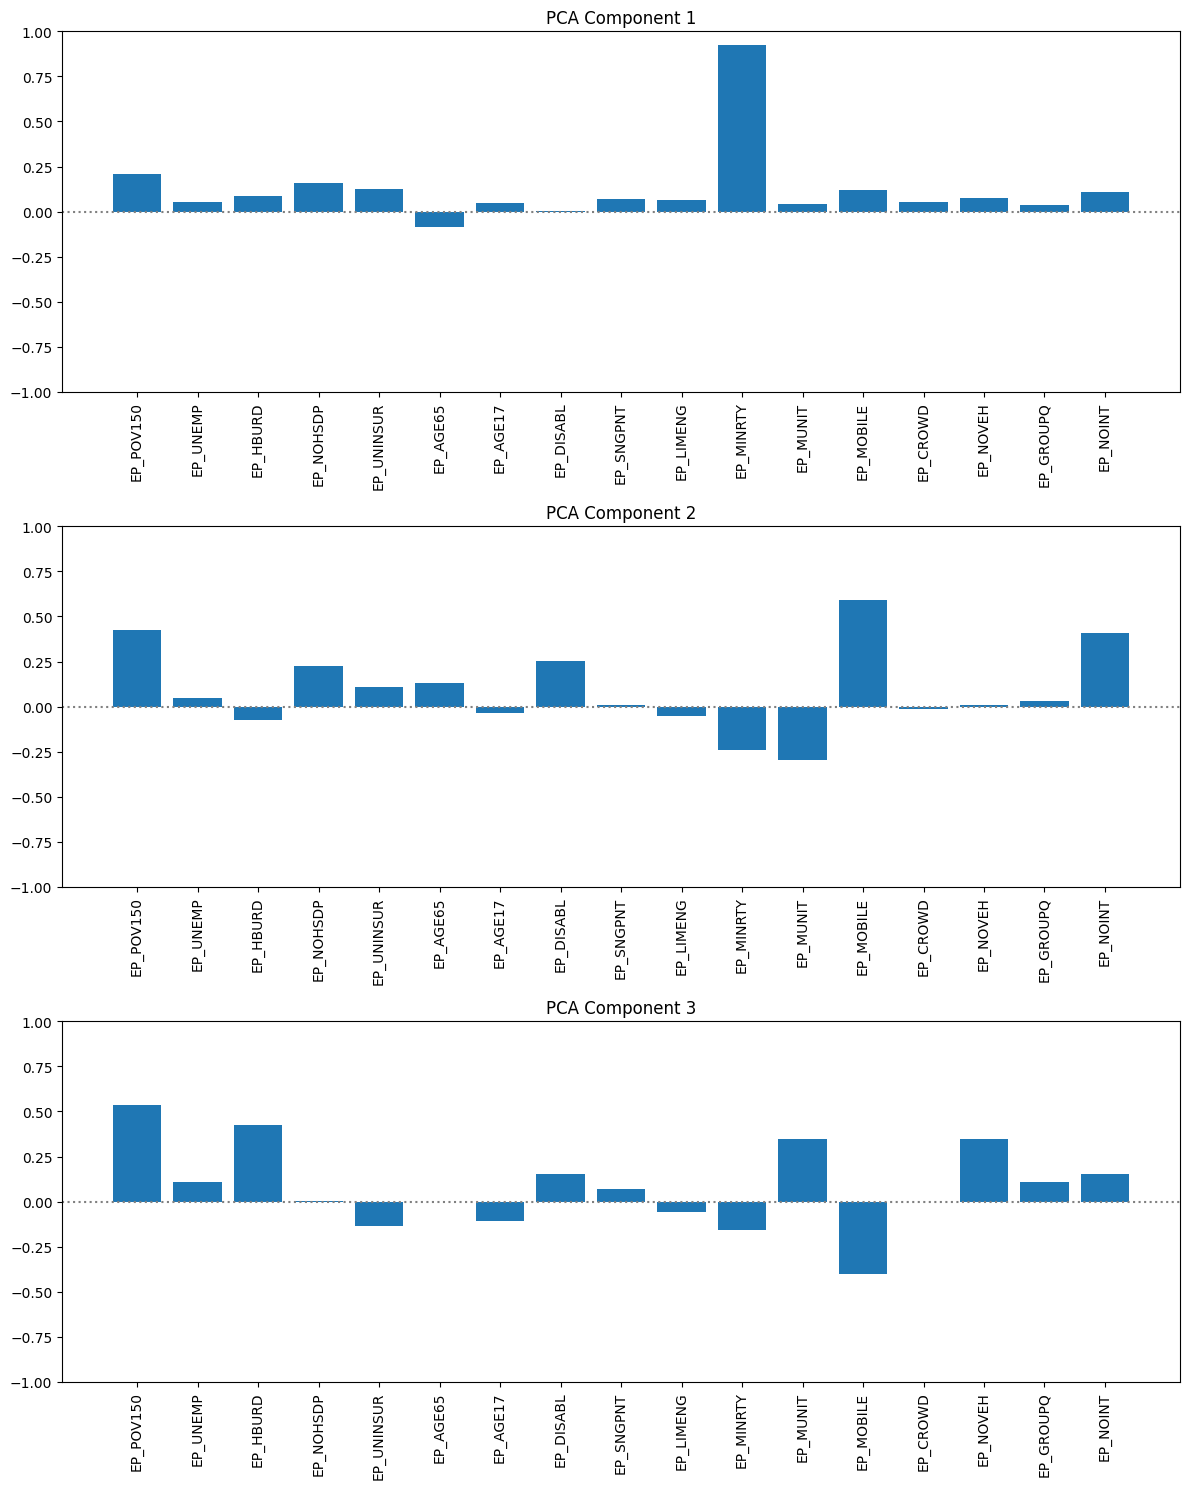

In [51]:
def visualize_pca(pca, feature_names):
    components = pca.components_
    num_components = components.shape[0]

    plt.figure(figsize=(12, num_components * 5))  # Adjust height based on number of components
    for i in range(num_components):
        plt.subplot(num_components, 1, i + 1)  # Change subplot configuration
        plt.bar(range(len(feature_names)), components[i])
        plt.xticks(range(len(feature_names)), feature_names, rotation=90)
        plt.ylim(-1, 1)
        plt.axhline(0, color='gray', linestyle='dotted')  # Add a dotted line at y=0
        plt.title(f'PCA Component {i+1}')
    plt.tight_layout()
    plt.show()

visualize_pca(pca, newsvi_data_drop.columns)


We can see that in the first component, which explain most of the variance in the dataset (Social Vulnerability) the main variables are the percentage of minorities, and the percentage of people living below 150% poverty estimate. 

For the second component, which explain less variance of the dataset, the most important variables are the percentage of people living in mobile homes, the percentage of people living below 150% poverty estimate, and the percentage of people living without internet.

For the third component, which explain the least variance among the components, introduces the variables of housing cost-burdened occupied housing and the percentage of houses without vehicles.

3. People often use PCA in downstream analyses (e.g., regression).
When doing this, they need to choose the number of principal components to use in the analysis.
There are several different ways to determine the number of principal components to retain.
One common method is to retain principal components that explain a certain percentage of the variance in the data.
    a. How many principal components are needed to explain 80% of the variance in the data?
    a. How many principal components are needed to explain 90% of the variance in the data?

In [52]:
#Creating a PCA with more than 3 components 
    
pca2 = PCA(n_components=10)         
newsvi_pca2 = pca2.fit_transform(newsvi_data_drop) 
var_explained = pca2.explained_variance_ratio_
cumulative_var_explained = var_explained.cumsum()

df = pd.DataFrame({
    'Component': range(1, len(var_explained) + 1),
    'Variance Explained': var_explained,
    'Cumulative Variance Explained': cumulative_var_explained
})
print(df)

   Component  Variance Explained  Cumulative Variance Explained
0          1            0.543039                       0.543039
1          2            0.197262                       0.740301
2          3            0.054249                       0.794549
3          4            0.039588                       0.834137
4          5            0.034511                       0.868648
5          6            0.024566                       0.893213
6          7            0.021879                       0.915092
7          8            0.018776                       0.933868
8          9            0.016268                       0.950136
9         10            0.013726                       0.963862


So, to explain 80% of the variance in the data we are very close using three components which explain 79.4%, or four components which explain 83.4%
At the same time, to explain 90% of the variance in the data we are very close using six components which explain 89.3%, or seven components which explain 91.5%

4. An alternative approach is to plot the eigenvalues of the principal components and retain the components that are above the "elbow" in the plot. In other words the eigenvalues that are substantially larger than the rest.
    a. Create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) of the eigenvalues of the principal components.
    a. How many principal components should be retained based on the scree plot? This video may help: [PCA Scree Plot](https://youtu.be/vFUvNICWVz4?si=6NbyRcLRGT8L1HzI)

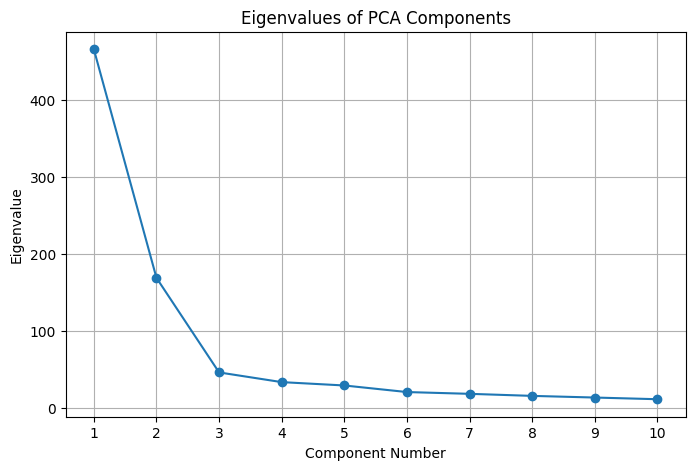

In [53]:
def visualize_eigvals(pca):
    eigvals = pca.explained_variance_
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigvals) + 1), eigvals, marker='o')
    plt.title('Eigenvalues of PCA Components')
    plt.xlabel('Component Number')
    plt.ylabel('Eigenvalue')
    plt.xticks(range(1, len(eigvals) + 1))
    plt.grid()
    plt.show()  

visualize_eigvals(pca2)

Using this method and looking for the elbow, we see that the 'elbow' in the plot is in number three, where the eigenvalue for the component 1 and 2 are substantially larger than the rest of the eigenvalues. So, we should retain the first and second component according this analysis.

5. Plot the first principal component score on a map of the US counties. Briefly describe any spatial patterns you see.

C:\Users\bsalvo\AppData\Local\Temp\ipykernel_18836\4016458757.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  alaska_centroid = alaska.unary_union.centroid
C:\Users\bsalvo\AppData\Local\Temp\ipykernel_18836\4016458757.py:38: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hawaii_centroid = hawaii.unary_union.centroid


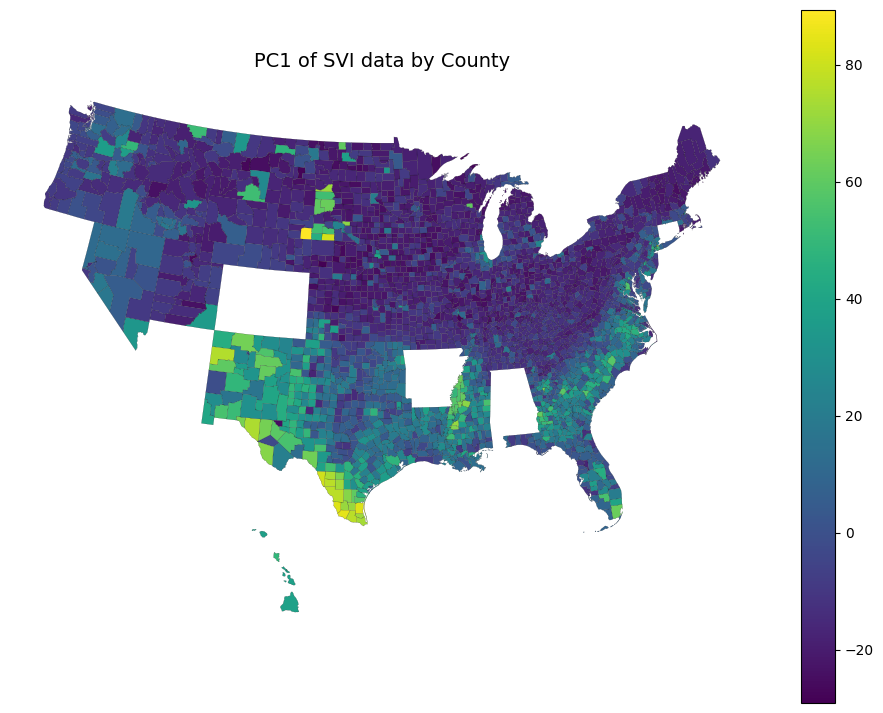

In [54]:
#Generating the PCA just for one component  

pca1 = PCA(n_components=1) 
X_pca1 = pca1.fit_transform(newsvi_data_drop)    

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import affinity

# Load county shapefile
counties = gpd.read_file("../data/raw/cb_2022_us_county_5m.zip")

# Project to an equal-area projection in meters
counties = counties.to_crs("EPSG:5070")

# Build PCA dataframe
X_pca_df = pd.DataFrame(X_pca1, columns=[f'PC{i+1}' for i in range(X_pca1.shape[1])])    
X_pca_df['GEOID'] = newsvi_data_drop.index  
# Separate Alaska, Hawaii, and continental US
alaska = counties[counties['STATEFP'] == '02'].copy()
hawaii = counties[counties['STATEFP'] == '15'].copy()
continental = counties[~counties['STATEFP'].isin(['02', '15', '72'])].copy()

# --- Move Alaska as a block ---
# Compute Alaska centroid to use as scaling origin
alaska_centroid = alaska.unary_union.centroid

# Scale and shift each geometry with the same parameters
alaska['geometry'] = alaska['geometry'].apply(
    lambda geom: affinity.scale(geom, xfact=0.35, yfact=0.35, origin=alaska_centroid)
)
alaska['geometry'] = alaska['geometry'].apply(
    lambda geom: affinity.translate(geom, xoff=3e6, yoff=-1.5e6)
)

# --- Move Hawaii as a block ---
hawaii_centroid = hawaii.unary_union.centroid
hawaii['geometry'] = hawaii['geometry'].apply(
    lambda geom: affinity.translate(geom, xoff=5.4e6, yoff=-1.8e6)
)

# Combine all back together
counties_shifted = pd.concat([continental, alaska, hawaii], ignore_index=True)

# Merge with PCA data
merged = counties_shifted.merge(X_pca_df, on='GEOID', how='left')   

# --- Plot each PCA component ---
for i in range(1):
    pc = f'PC{i+1}'
    fig, ax = plt.subplots(figsize=(12, 9))
    merged.plot(column=pc, ax=ax, legend=True,
                cmap='viridis', edgecolor='black', linewidth=0.1)
    ax.set_title(f"{pc} of SVI data by County", fontsize=14)
    ax.axis('off')
    plt.show()



We can see that, for the first component, the most important variables are EP_MINRTY, which indicates the percentage of minorities living in a given geographic area, and EP_POV150, which represents the percentage of people living below 150% of the poverty threshold. Therefore, the map shows the distribution of these variables, with yellow cells indicating areas where the variance is mostly explained by those variables.